# CUSTOMER SEGMENTATION PROJECT

### PROJECT GOAL:
The goal of this project is cluster the customers into different groups
based on their spending behavioural pattern. This will help understand
the taste of each customers and will help the company to target each customer with the right advert, product and service.

In [31]:
# data wrangling libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# data modelling and statistical analysis library
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import k_means,dbscan


In [11]:
data = pd.read_csv('cleaned_marketing.csv')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# check the columns
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [12]:
# drop the unnecesary columns

data.drop(columns= ['ID','Dt_Customer'], inplace=True)

In [20]:
# check the datatypes of each column and null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education            2216 non-null   object
 1   Marital_Status       2216 non-null   object
 2   Income               2216 non-null   int32 
 3   Kidhome              2216 non-null   int64 
 4   Teenhome             2216 non-null   int64 
 5   Recency              2216 non-null   int64 
 6   MntWines             2216 non-null   int64 
 7   MntFruits            2216 non-null   int64 
 8   MntMeatProducts      2216 non-null   int64 
 9   MntFishProducts      2216 non-null   int64 
 10  MntSweetProducts     2216 non-null   int64 
 11  MntGoldProds         2216 non-null   int64 
 12  NumDealsPurchases    2216 non-null   int64 
 13  NumWebPurchases      2216 non-null   int64 
 14  NumCatalogPurchases  2216 non-null   int64 
 15  NumStorePurchases    2216 non-null   int64 
 16  NumWeb

In [8]:
# doublecheck the null values 

data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
# generate age column, drop year_birth, handle data type issues

data['age'] = [2024 - x for x in data['Year_Birth']] # create age
data.drop(columns=['Year_Birth'], inplace=True) # drop year of birth


In [19]:
# converting columns to integer
data = data[data['Income'] != ' ']
data.reset_index(drop = True, inplace = True)

data = data.astype({
    'Income': 'int'
})

In [28]:
# inspecting the categorical columns

data['Education'].unique()
data['Marital_Status'].value_counts()

Married     857
Together    573
single      478
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

In [27]:
data['Marital_Status'] = ['single' if x in ['YOLO','Absurd','Alone','Single'] else x for x in data['Marital_Status']]

In [34]:
cat_cols = ['Marital_Status','Education']
encoder = LabelEncoder()
for cols in cat_cols:
    data[f'{cols}_nums'] = encoder.fit_transform(data[cols])

In [35]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Marital_Status_nums,Education_nums
0,Graduation,single,58138,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,67,4,2
1,Graduation,single,46344,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,70,4,2
2,Graduation,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,59,2,2
3,Graduation,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,40,2,2
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,43,1,4


In [36]:
final_data = data.drop(columns = cat_cols)

In [38]:
# modelling the data

scaler = StandardScaler()
scaled_df = scaler.fit_transform(final_data)
final_data = pd.DataFrame(data=scaled_df, columns=final_data.columns)
pca = PCA(n_components= 3)
columns = ['col1','col2','col3']
scaled_df = pca.fit_transform(final_data)
scaled_df = pd.DataFrame(data=scaled_df, columns=columns)

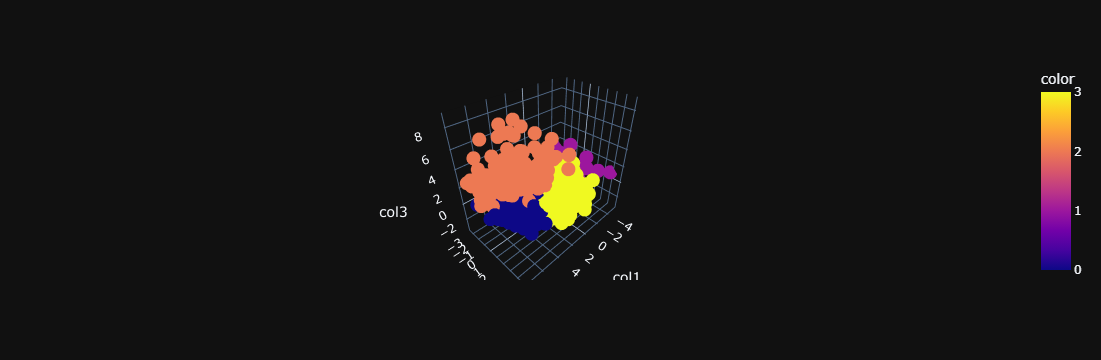

In [47]:
px.scatter_3d(data_frame=scaled_df, x = 'col1', y = 'col2', z = 'col3',
              color= predictions)

In [42]:
# clustering 

kmeans = k_means(X = scaled_df, n_clusters=4,n_init= 'auto')

In [46]:
predictions = kmeans[1]

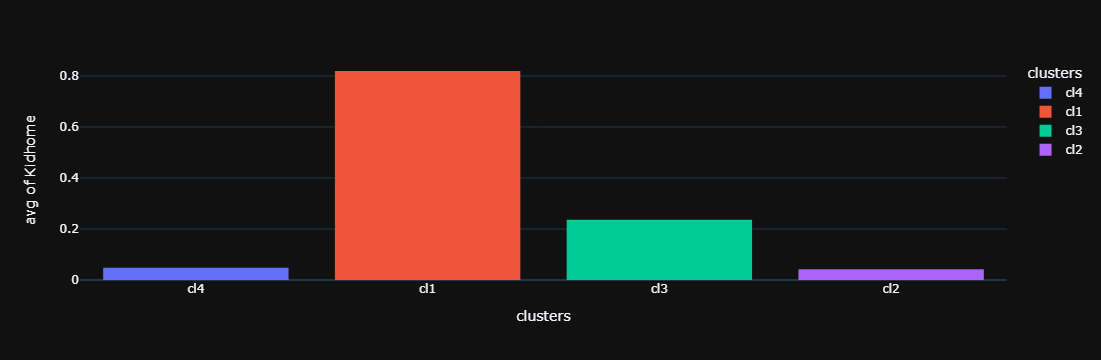

In [53]:
px.histogram(data_frame=data, x = 'clusters', y = 'Kidhome',
             histfunc='avg', color = 'clusters')

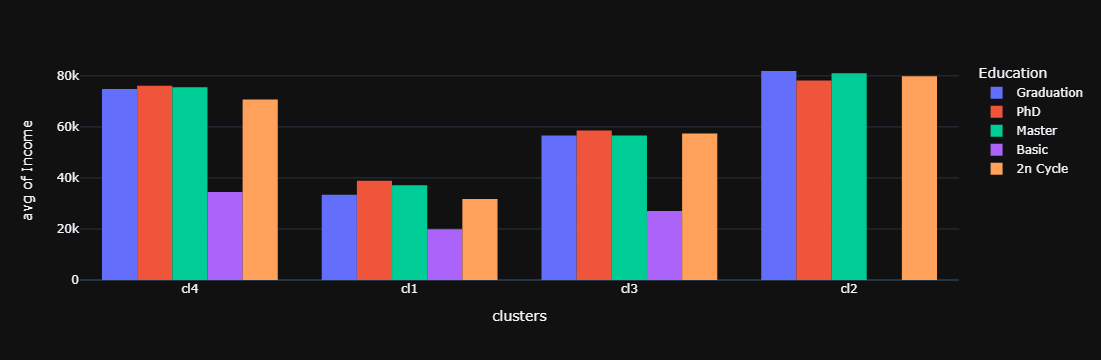

In [52]:
data['clusters'] = ['cl1' if x == 1 else 'cl2' if x == 2 else
                    'cl3' if x == 3 else 'cl4' for x in predictions]
px.histogram(data_frame=data, x = 'clusters', y = 'Income',
             histfunc='avg', color = 'Education', barmode='group')


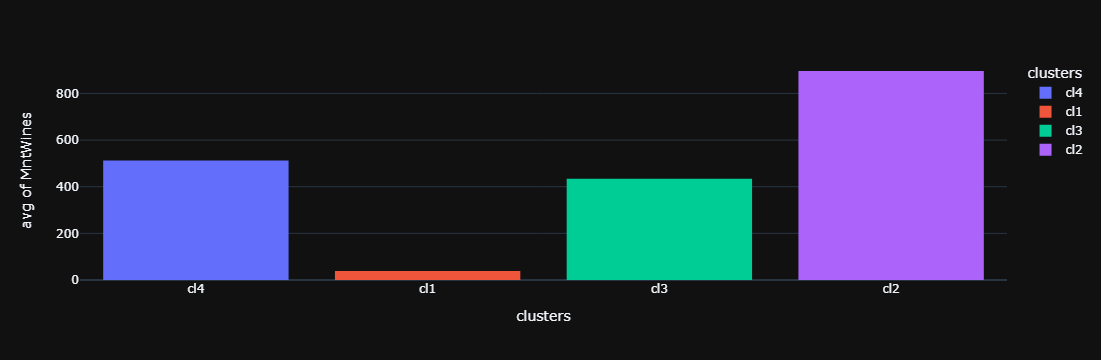

In [54]:
px.histogram(data_frame=data, x = 'clusters', y = 'MntWines',
             histfunc='avg', color = 'clusters')